In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from data_helper import readImg, readImgInv, imagePatches, removeBlackImg, removeCorrespondence

def data_collector(fns_input, fns_output):
    
    sim_input = []
    sim_output = []
    
    for fn_input, fn_output in zip(fns_input, fns_output):
        
        # load simulated heat map (TRAJECTORY SIMULATION) and target road for Hannover ####
        sim_heatmap_hannover = readImg(fn_input)
        sim_road_hannover = readImg(fn_output)
        
        sim_hm_patches_overlap = imagePatches(sim_heatmap_hannover, p_size_1, p_size_1, int(p_size_1))
        sim_road_patches_overlap = imagePatches(sim_road_hannover, p_size_1, p_size_1, int(p_size_1))
        sim_road_patches_overlap_new = removeCorrespondence(sim_road_patches_overlap, sim_hm_patches_overlap)
        sim_hm_patches_overlap_new = removeCorrespondence(sim_hm_patches_overlap, sim_road_patches_overlap)
        sim_road_patches_overlap_new_new = removeBlackImg(sim_road_patches_overlap)
        
        sim_input += sim_hm_patches_overlap_new
        sim_output += sim_road_patches_overlap_new_new
    
    return sim_input, sim_output

Using TensorFlow backend.


In [2]:
p_size_1 = 128

tmpPath = r"../tmp_data/data_feng/geb25/"

trainPath = r"Data/geb25/"
fns_input = [trainPath + r"geb.png"]
fns_output = [trainPath + r"geb25.png"]

In [3]:
sim_hm_patches_32_new, sim_road_patches_32_new_new = data_collector(fns_input, fns_output)
print('Number of tiles: ', len(sim_hm_patches_32_new))

Number of tiles:  35288


31760 3528 31760 3528
Input Shape of the models (31760, 128, 128, 1)


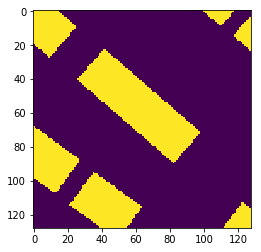

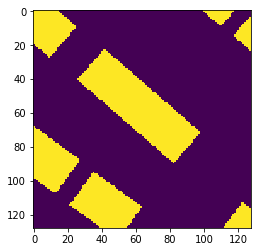

In [4]:
#### experience 1 - simulated hm
index_list_sim = list(range(len(sim_hm_patches_32_new)))
np.random.shuffle(index_list_sim)

idx_sim = int(len(sim_hm_patches_32_new) / 10)#1000
index_list_test_sim = index_list_sim[-idx_sim:]
index_list_test_sim.sort()
sim_hm_test = [sim_hm_patches_32_new[i] for i in index_list_test_sim]
sim_road_test = [sim_road_patches_32_new_new[i] for i in index_list_test_sim]

index_list_train_sim = index_list_sim[:-idx_sim]
index_list_train_sim.sort()
sim_hm_train = [sim_hm_patches_32_new[i] for i in index_list_train_sim]
sim_road_train = [sim_road_patches_32_new_new[i] for i in index_list_train_sim]

#from sklearn.model_selection import train_test_split
#sim_hm_train, sim_hm_test, sim_road_train, sim_road_test = train_test_split(sim_hm_patches_32_new, 
#                                                                            sim_road_patches_32_new_new,
#                                                                            test_size=0.33, random_state=42)

print(len(sim_hm_train), len(sim_hm_test), len(sim_road_train), len(sim_road_test))

x_train_sim = np.reshape(sim_hm_train, (len(sim_hm_train), p_size_1, p_size_1, 1))
y_train_sim = np.reshape(sim_road_train, (len(sim_road_train), p_size_1, p_size_1, 1))
x_test_sim = np.reshape(sim_hm_test, (len(sim_hm_test), p_size_1, p_size_1, 1))
y_test_sim = np.reshape(sim_road_test, (len(sim_road_test), p_size_1, p_size_1, 1))

# save image patch arrays
np.save(tmpPath + "x_train_sim.npy", x_train_sim)
np.save(tmpPath + "y_train_sim.npy", y_train_sim)
np.save(tmpPath + "x_test_sim.npy", x_test_sim)
np.save(tmpPath + "y_test_sim.npy", y_test_sim)

plt.figure()
plt.imshow(np.reshape(x_test_sim[2], (p_size_1,p_size_1)))
plt.figure()
plt.imshow(np.reshape(y_test_sim[2], (p_size_1,p_size_1)))

input_shape1 = (None, None, 1) #x_train_sim[0].shape
print('Input Shape of the models', x_train_sim.shape)